In [4]:
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#!pip install xlrd

### Positive HIV

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df=pd.read_excel("/content/HIV estimate 2023 (1).xlsx", sheet_name='Sheet1')
df

,S. No.,State/UT,Percentage of Adult HIV Prevalence
0,1,Andhra Pradesh,0.62
1,2,Arunachal Pradesh,0.25
2,3,Assam,0.13
3,4,Bihar,0.16
4,5,Chhattisgarh,0.16
5,6,Delhi,00:31:00
6,7,Goa,0.29
7,8,Gujarat,0.19
8,9,Himachal Pradesh,0.11
9,10,Haryana,0.23


In [24]:
df.columns

Index(['S. No.', 'State/UT', 'Percentage of Adult HIV Prevalence '], dtype='object')

In [25]:
df.rename(columns={'Percentage of Adult HIV Prevalence ':'pos_hiv'}, inplace=True)

In [26]:
df

,S. No.,State/UT,pos_hiv
0,1,Andhra Pradesh,0.62
1,2,Arunachal Pradesh,0.25
2,3,Assam,0.13
3,4,Bihar,0.16
4,5,Chhattisgarh,0.16
5,6,Delhi,00:31:00
6,7,Goa,0.29
7,8,Gujarat,0.19
8,9,Himachal Pradesh,0.11
9,10,Haryana,0.23


In [28]:
df.head()

,S. No.,State/UT,pos_hiv
0,1,Andhra Pradesh,0.62
1,2,Arunachal Pradesh,0.25
2,3,Assam,0.13
3,4,Bihar,0.16
4,5,Chhattisgarh,0.16


In [33]:
map_data=gpd.read_file(r"/content/Indian_states.shp")
map_data

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.1686 29.37432,..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.7429 26...."
3,Bihar,"MULTIPOLYGON (((84.5072 24.26323, 84.50355 24...."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.1065,..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.1135 14...."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [34]:
merged = map_data.set_index('st_nm').join(df.set_index('State/UT'))#.reset_index(level=0, inplace=True)
merged#.head()

,geometry,S. No.,pos_hiv
st_nm,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.1686 29.37432,...",NaN,NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.7429 26....",3,0.13
Bihar,"MULTIPOLYGON (((84.5072 24.26323, 84.50355 24....",4,0.16
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",32,0.26
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",5,0.16
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.1065,...",NaN,NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN,NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.1135 14....",7,0.29


<Figure size 14400x9600 with 0 Axes>

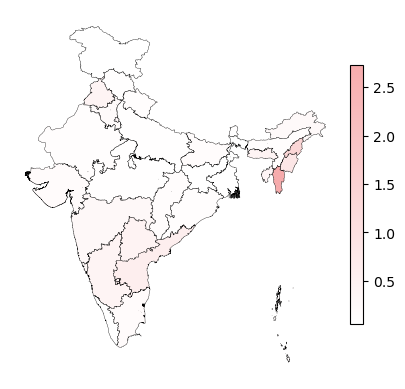

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(247/256, 1, N)  # Red channel values (constant at 0)
vals[:, 1] = np.linspace(172/256, 1, N)  # Green channel values (constant at 0)
vals[:, 2] = np.linspace(173/256, 1, N)  # Blue channel values (from blue to violet)

# Invert the colormap
blue_to_violet_cmap = ListedColormap(vals[::-1])

# Assuming 'merged' is a GeoDataFrame with a 'Percentage with iodised salt' column for plotting
fig = plt.figure(figsize=(12, 8), dpi=1200)

# Create the plot using the custom colormap, disable the GeoDataFrame legend
ax = merged.plot(column='pos_hiv', categorical=False, legend=False,
                 cmap=blue_to_violet_cmap, edgecolor='black', linewidth=0.25)

# Customize the colorbar legend with reduced length (shrink=0.7)
sm = plt.cm.ScalarMappable(cmap=blue_to_violet_cmap,
                           norm=plt.Normalize(vmin=merged['pos_hiv'].min(),
                                               vmax=merged['pos_hiv'].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, pad=0.02, shrink=0.7)  # Adjust the shrink parameter as needed

# Remove x-axis and y-axis ticks and frame
plt.xticks([])
plt.yticks([])
ax.set_frame_on(False)

# Save the plot
plt.savefig('hiv_pos.svg', bbox_inches='tight')

# Show the plot (optional)
plt.show()


<Figure size 14400x9600 with 0 Axes>

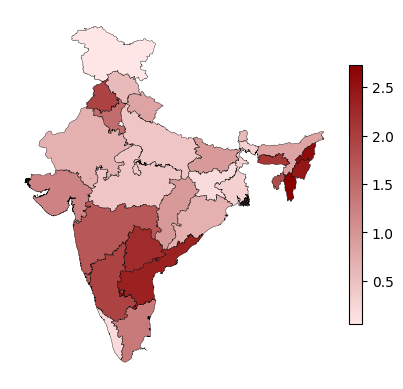

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create a custom colormap from whitish-red to blackish-red
N = 256
vals = np.ones((N, 4))  # Initialize an array with shape (N, 4) for RGBA
vals[:, 0] = np.linspace(1, 139/256, N)
vals[:, 1] = np.linspace(0.9, 0, N)
vals[:, 2] = np.linspace(0.9, 0, N)

# Custom colormap
whitish_to_blackish_red_cmap = ListedColormap(vals)

# Assuming 'merged' is a GeoDataFrame with a 'pos_hiv' column for plotting
fig = plt.figure(figsize=(12, 8), dpi=1200)

# Create the plot using the custom colormap
ax = merged.plot(column='pos_hiv', categorical=False, legend=False,
                 cmap=whitish_to_blackish_red_cmap, edgecolor='black', linewidth=0.25)

# Customize the colorbar legend
sm = plt.cm.ScalarMappable(cmap=whitish_to_blackish_red_cmap,
                           norm=plt.Normalize(vmin=merged['pos_hiv'].min(),
                                               vmax=merged['pos_hiv'].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, pad=0.02, shrink=0.7)  # Adjust the shrink parameter as needed

# Remove x-axis and y-axis ticks and frame
plt.xticks([])
plt.yticks([])
ax.set_frame_on(False)

# Save the plot
plt.savefig('hiv_pos_red_scale.svg', bbox_inches='tight')

# Show the plot (optional)
plt.show()
